First few rows of the dataset:
   client_id  age           job  marital  education  account_id in_default  \
0    4815378   58    management  married   tertiary           1         no   
1    5217541   44    technician   single  secondary           2         no   
2    6654642   33  entrepreneur  married  secondary           3         no   
3    1421898   47   blue-collar  married    unknown           4         no   
4    2387933   33       unknown   single    unknown           5         no   

   balance housing loan  ... campaign_id  day  month duration  campaign  \
0   2143.0     yes   no  ...           1    5    may      261         1   
1     29.0     yes   no  ...           2    5    may      151         1   
2      2.0     yes  yes  ...           3    5    may       76         1   
3   1506.0     yes   no  ...           4    5    may       92         1   
4      1.0      no   no  ...           5    5    may      198         1   

   pdays  previous  outcome_id  poutcome        y

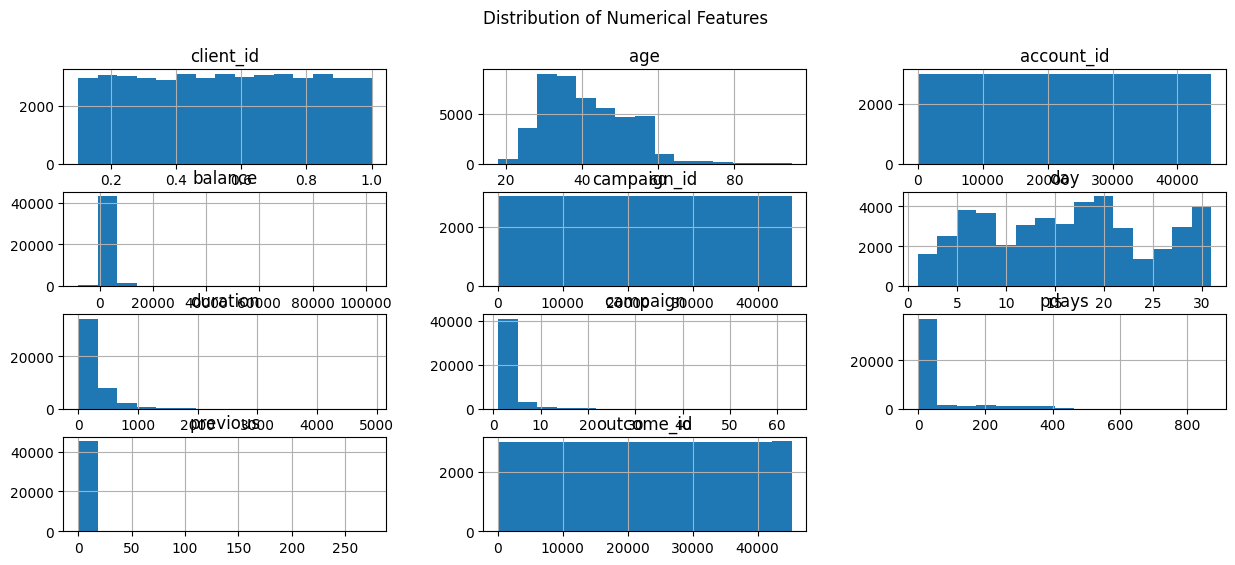

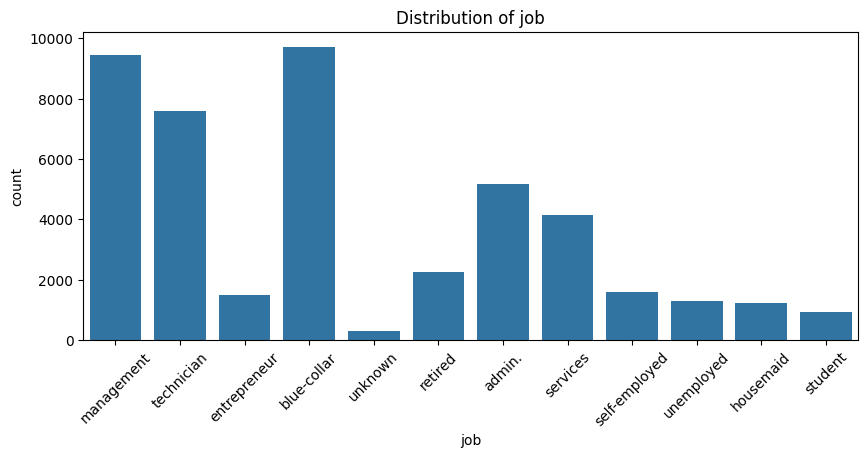

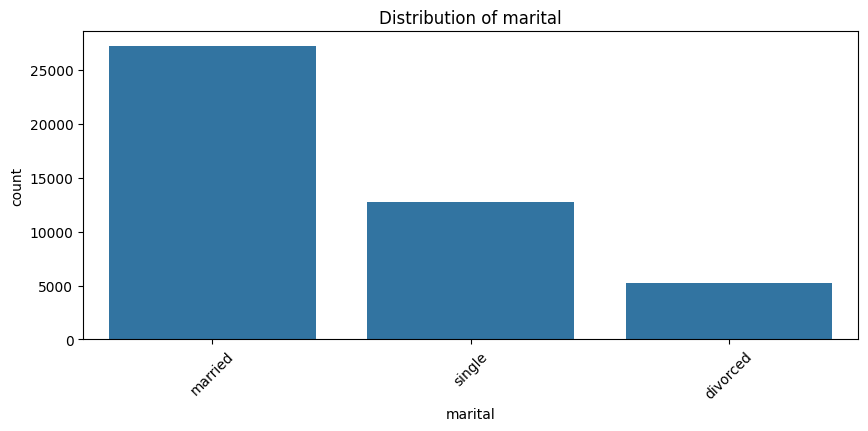

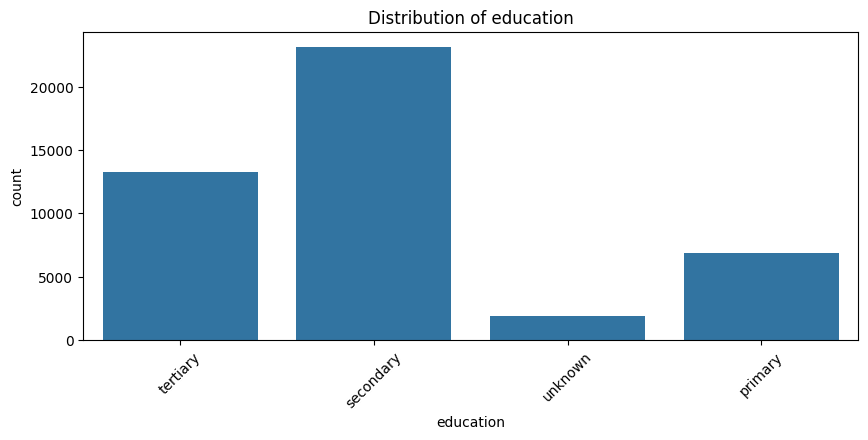

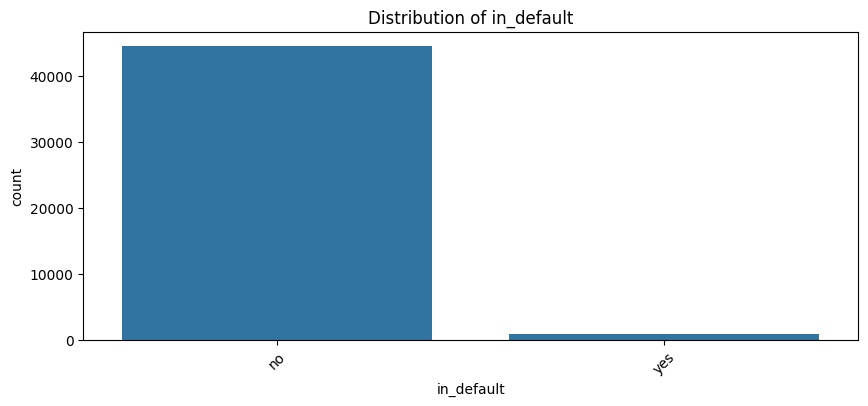

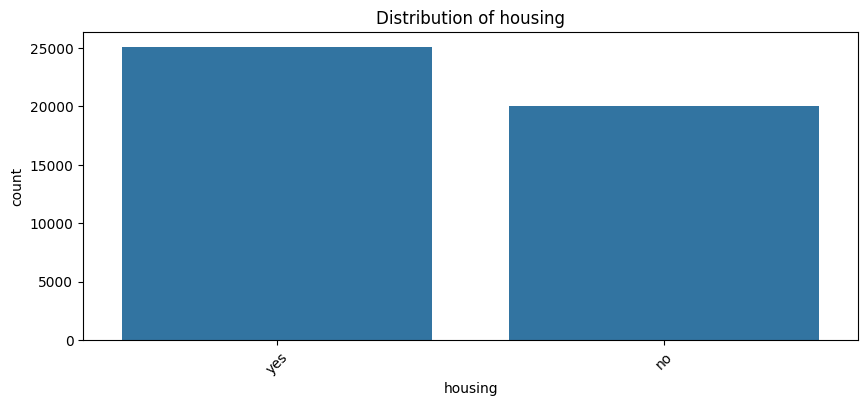

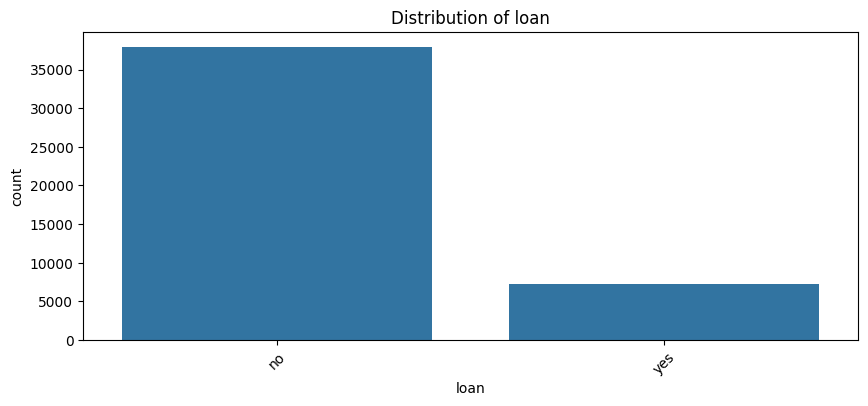

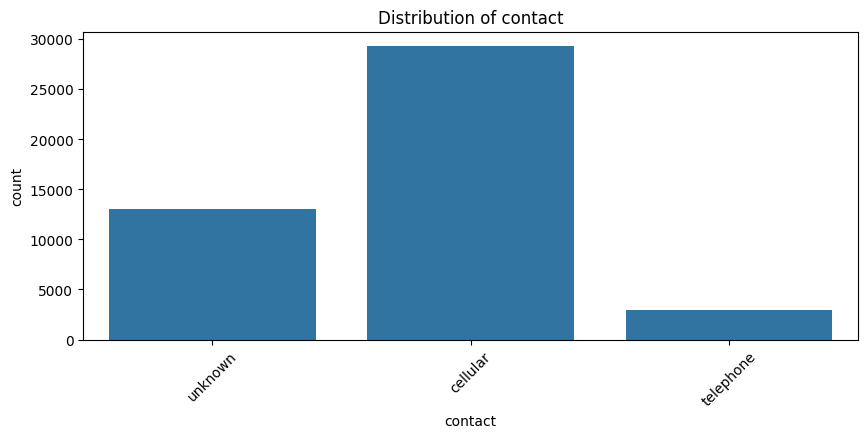

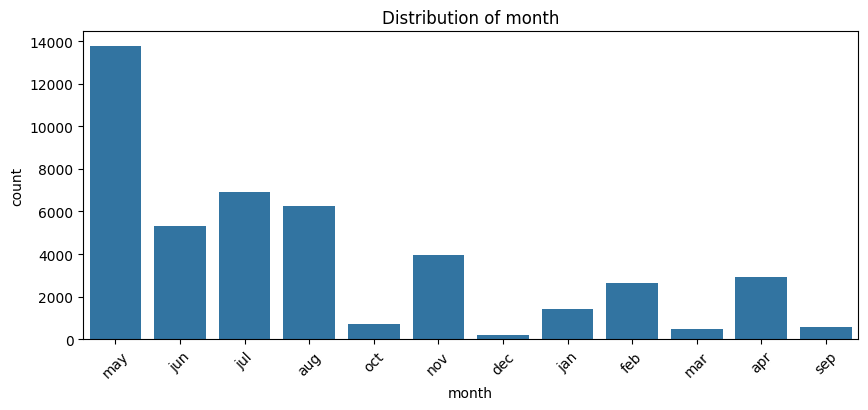

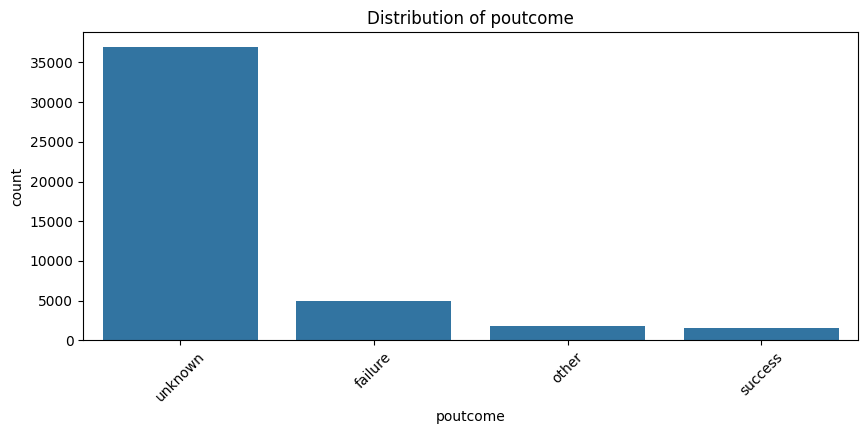

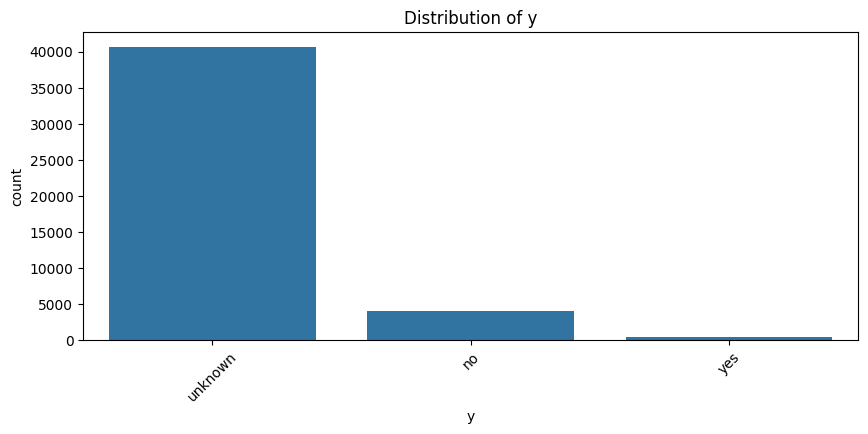

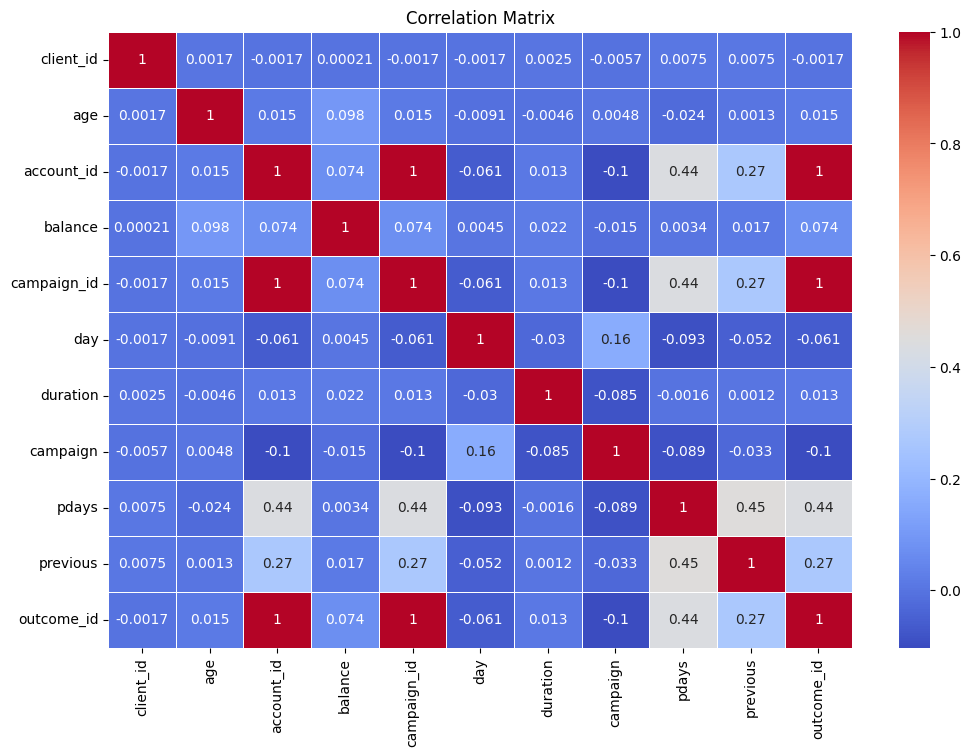

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
# Load the data
try:
    database_path = "data/data.db"
    conn = sqlite3.connect(database_path)
    query = open('data/fetch_all.sql','r').read()
    df = pd.read_sql_query(query, conn)
    conn.close()
except (sqlite3.Error, FileNotFoundError) as e:
    print(f"Error: {e}")
    df = pd.DataFrame()  # Create an empty DataFrame to avoid further errors

if not df.empty:
    # Display the first few rows of the dataset
    print("First few rows of the dataset:")
    print(df.head())

    # Summary statistics
    print("\nSummary statistics:")
    print(df.describe(include='all'))

    # Check for missing values
    print("\nMissing values:")
    print(df.isnull().sum())

    # Distribution of numerical features
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    if not numerical_features.empty:
        df[numerical_features].hist(bins=15, figsize=(15, 6))
        plt.suptitle('Distribution of Numerical Features')
        plt.show()
    else:
        print("No numerical features found.")

    # Distribution of categorical features
    categorical_features = df.select_dtypes(include=['object']).columns
    if not categorical_features.empty:
        for feature in categorical_features:
            plt.figure(figsize=(10, 4)) 
            sns.countplot(data=df, x=feature)
            plt.title(f'Distribution of {feature}')
            plt.xticks(rotation=45)
            plt.show()
    else:
        print("No categorical features found.")

    # Correlation matrix
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("DataFrame is empty. No analysis to display.")